# Machine Learning Project: Clusterization of Insurance Clients
### David García Allo - 11/03/2022 
### Latest update: 15/07/2022
#### Description
Clustering the insurance data obtained from the given url. This data contains the annual charges in dollars in function of different $\\$
personal situations of the clients, where the more relevants are age, bmi (Body Mass Index) and if they smoke or not. The data includes $\\$
other features as the sex, number of children and region of the clients wich we can see as less relevant once we see the data. $\\%

Once we have trained the clusterization algorithm we can include the new clients in the most adecuate cluster for them having an $\\$
algorithm thats works without the need of human supervision.

#### External modules needed
- numpy
- pandas
- matplotlib
- sklearn


#### Comments
We are capable of distinguish 3 cluster and identify the caracteristic data of each type. Focusing only in the more relevant $\\$
features that affects the charges.

### Needed modules

In [1]:
# Import modules and classes
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

### Load and visualize data

In [2]:
path = "https://www.dropbox.com/s/hd686c6ri1tj0b0/insurance.csv?dl=1"
df   = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Change string values into integers values, for example 'no smoker' = 0  and 'smoker' = 1

In [3]:
data      = df.to_numpy(dtype=str)
data[:,1] = [0 if data[i,1]=='male' else 1 for i in range(len(data[:,1]))] #male=0 female=1
data[:,4] = [0 if data[i,4]=='no' else 1 for i in range(len(data[:,4]))] #no-smoker=0 smoker=1
#souhtwest=0 southeast=1 northwest=2 northeast=3
data[:,5] = [0 if data[i,5]=='southwest' else (1 if data[i,5]=='southeast' else (2 if data[i,5]=='northwest' else 3)) for i in range(len(data[:,5]))]
data      = np.array(data, dtype=float) #Turn integers into floats

### Training different clusterization models

In [4]:
models = [KMeans(n_clusters=2, random_state=42, n_init=10),           
          KMeans(n_clusters=3, random_state=42, n_init=10),
          MiniBatchKMeans(n_clusters=2, random_state=42, n_init=10),  
          MiniBatchKMeans(n_clusters=3, random_state=42, n_init=10),                         
          DBSCAN(eps=0.02*np.max(data), min_samples=20),
          DBSCAN(eps=0.005*np.max(data), min_samples=20),
          GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42),
          GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42),
          BayesianGaussianMixture(n_components=3, n_init=30, random_state=42),
          BayesianGaussianMixture(n_components=3, max_iter=1000, n_init=10, weight_concentration_prior=0.01, random_state=42)]

titles = [str(model) for model in models]
fits   = [model.fit(data) for model in models]

### Cluster classification of each model

In [5]:
#These methods have different attributes, to predictions some of them uses labels_ attribute and others the predict attribute
predicts = []
for fit in fits:
    try:
        predicts.append(fit.labels_) 
    except AttributeError:
        predicts.append(fit.predict(data))
        
n_clusters = [len(np.unique(predict)) for predict in predicts] 
#Number of clusters, the number of diferent predictions in each model. Visualize the predicts lists if needed
#print(predicts[0])

### 2D plots of each feature vs the charges to visualize the results of each model

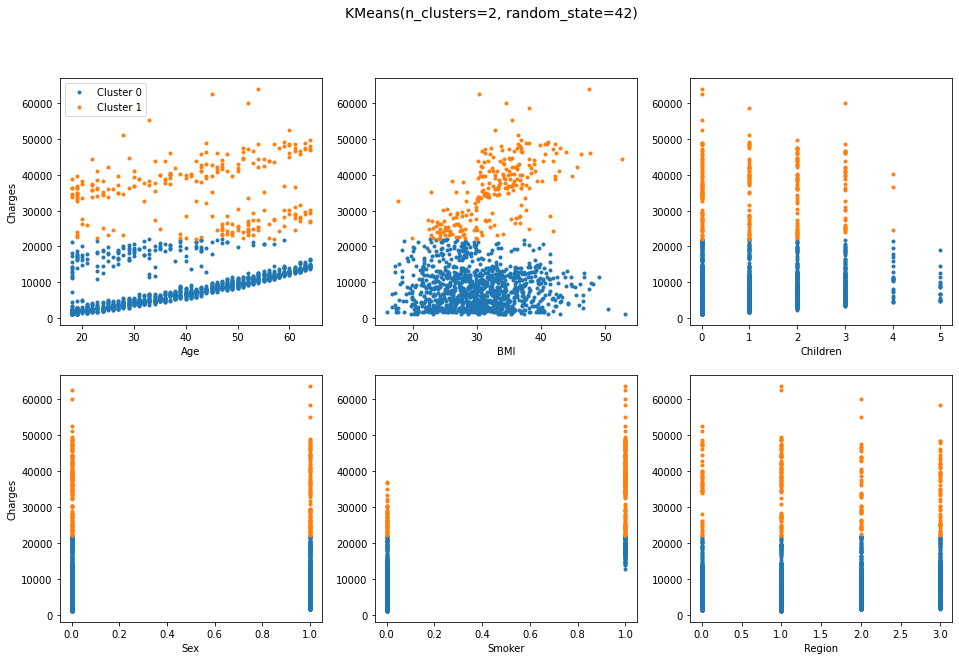

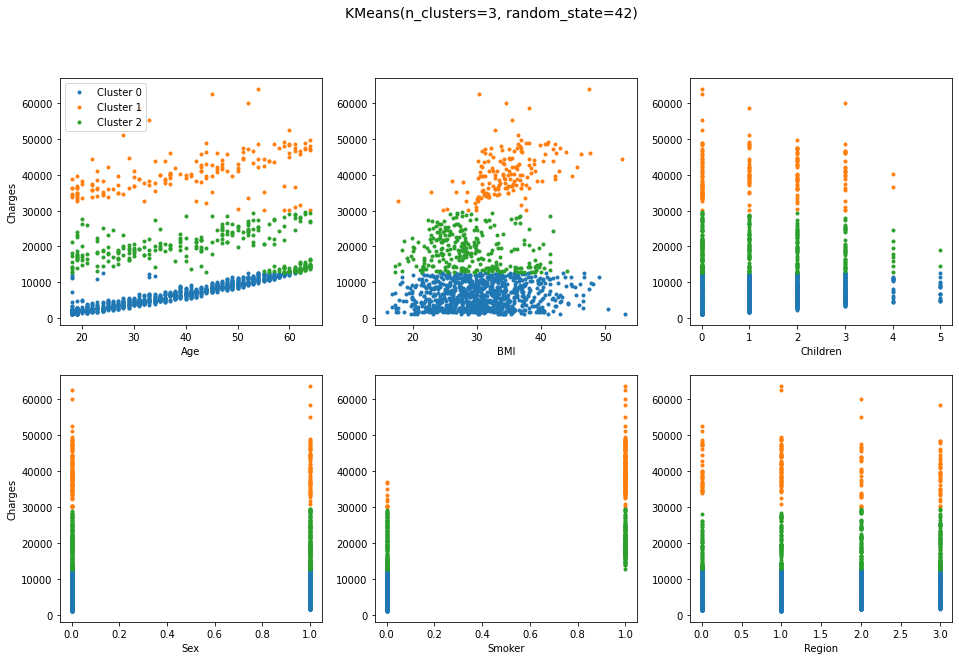

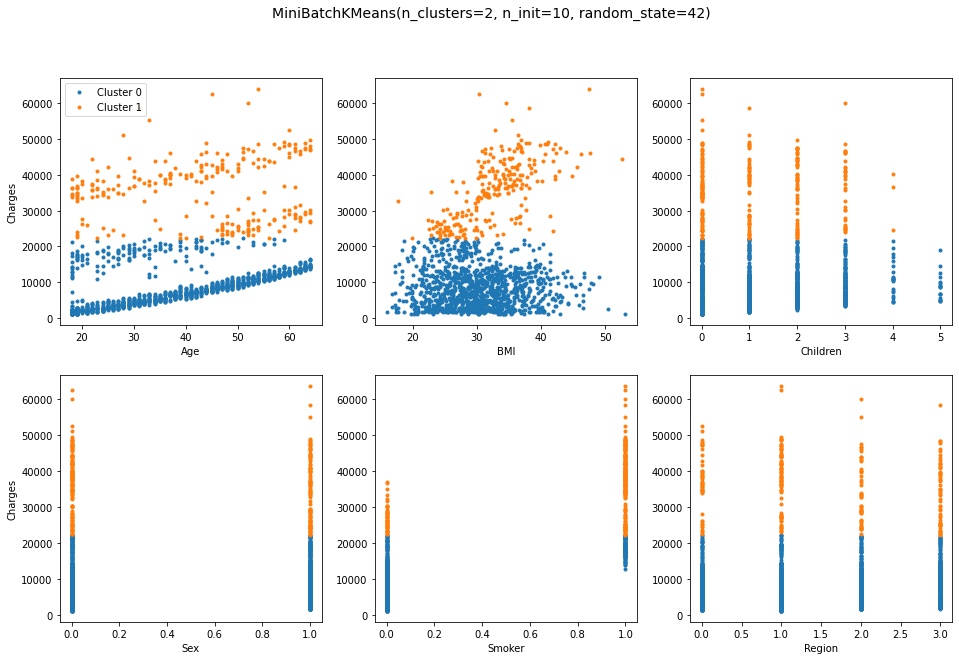

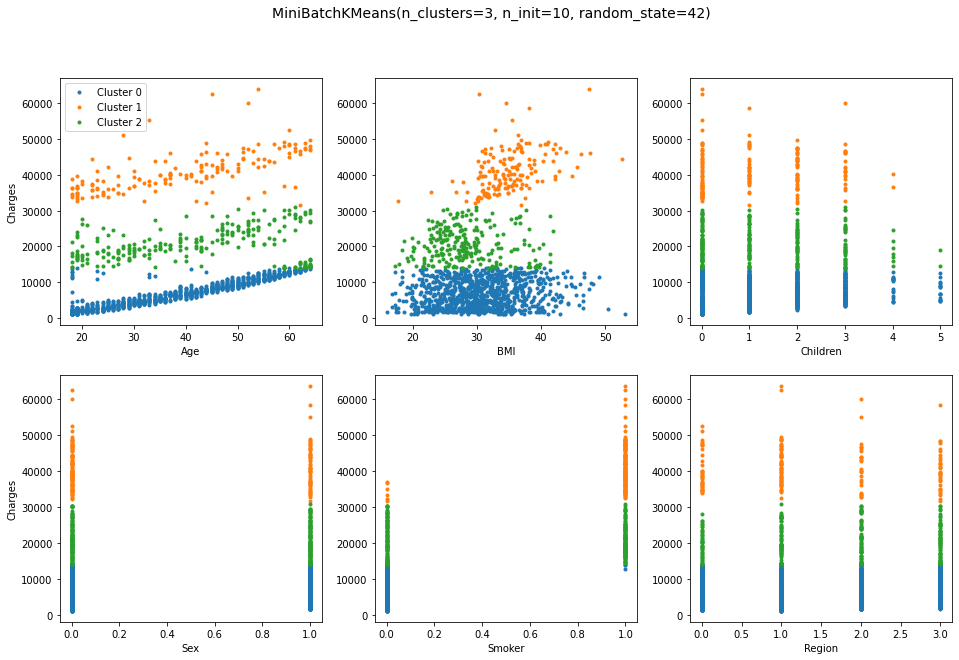

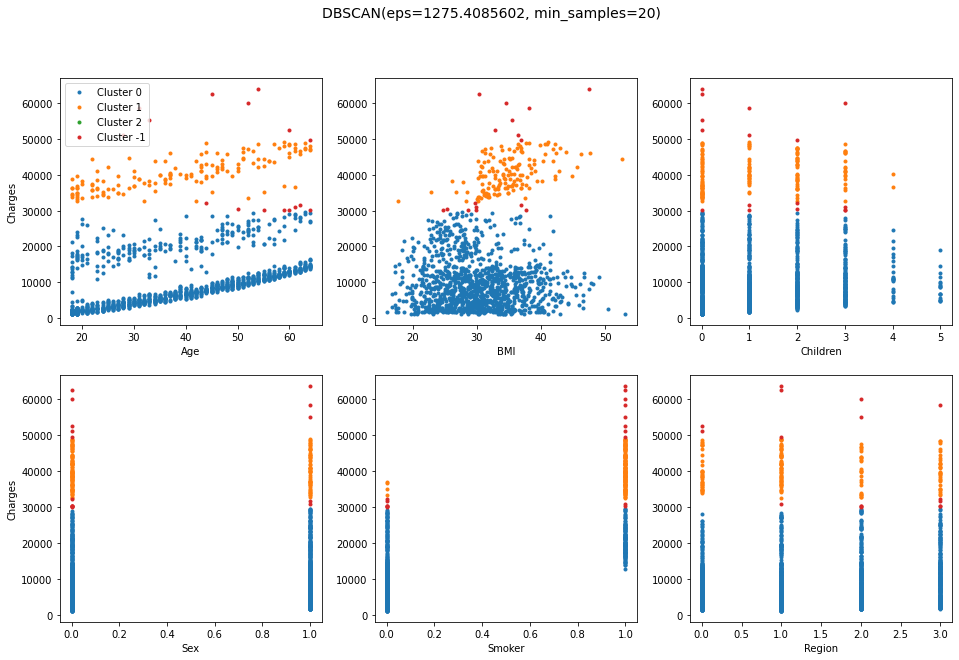

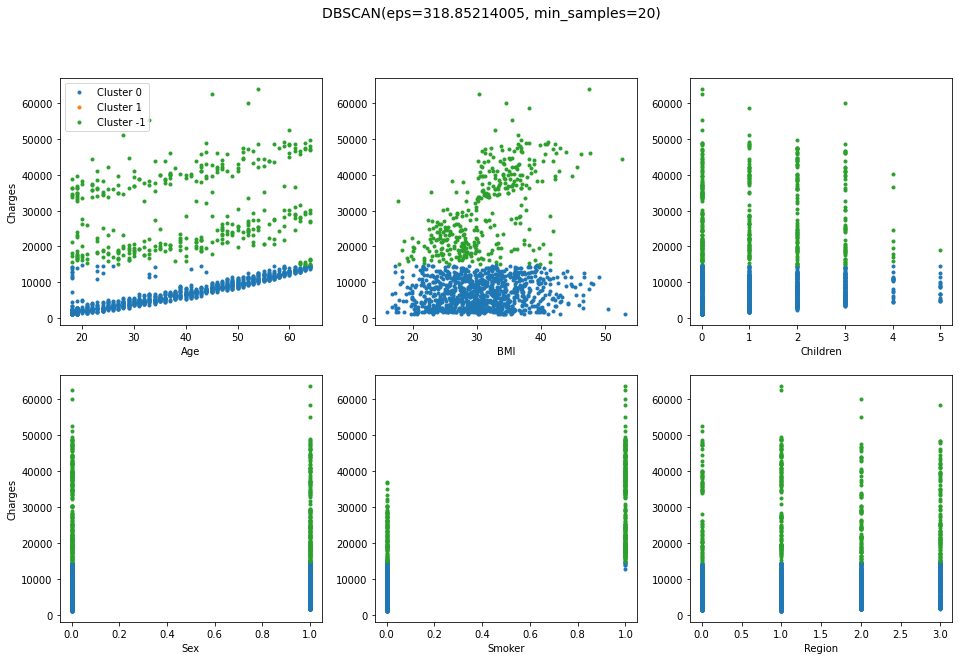

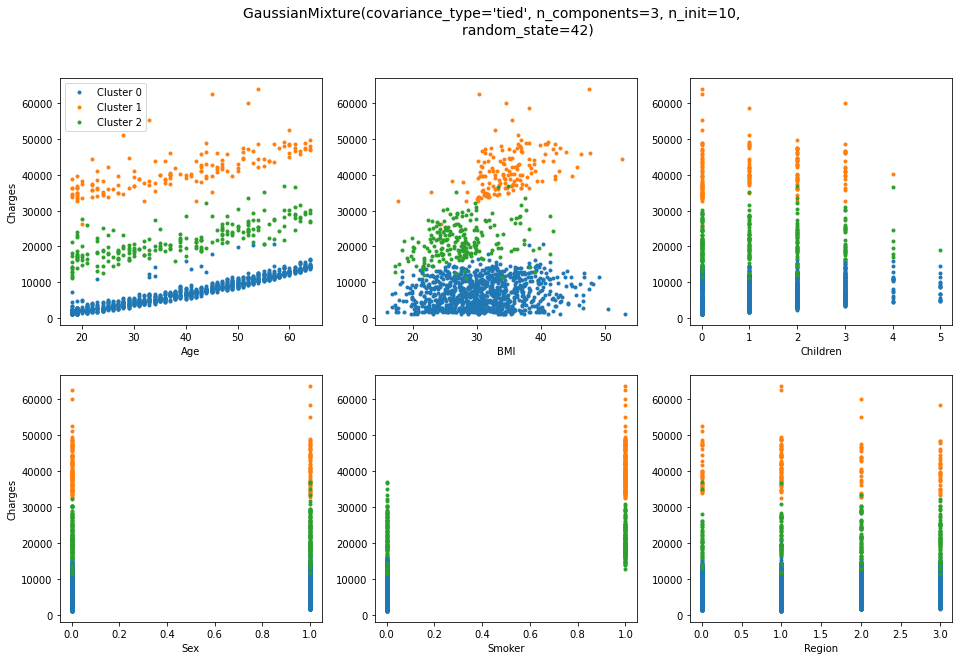

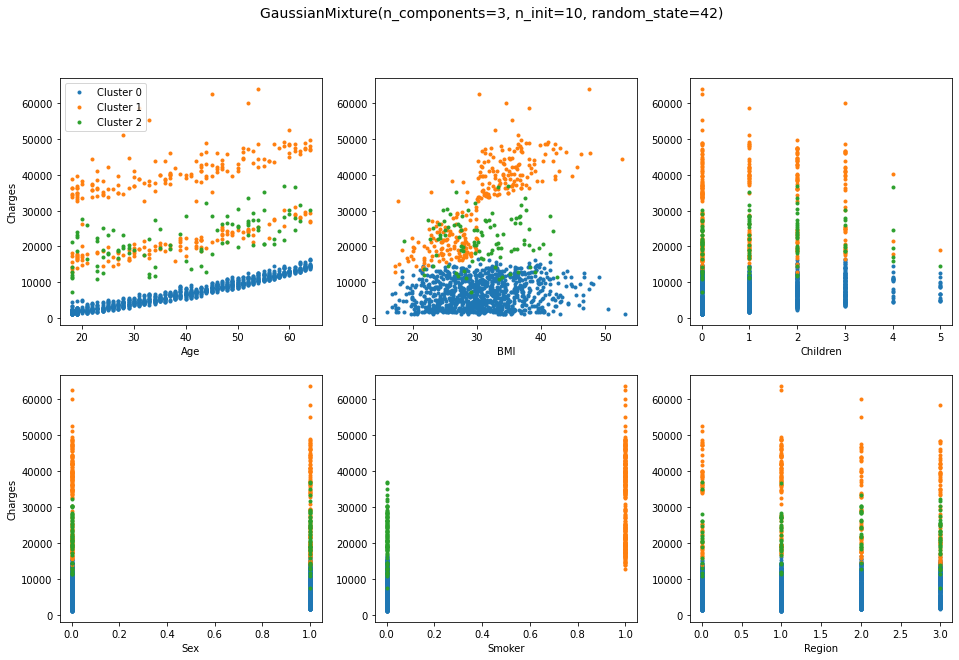

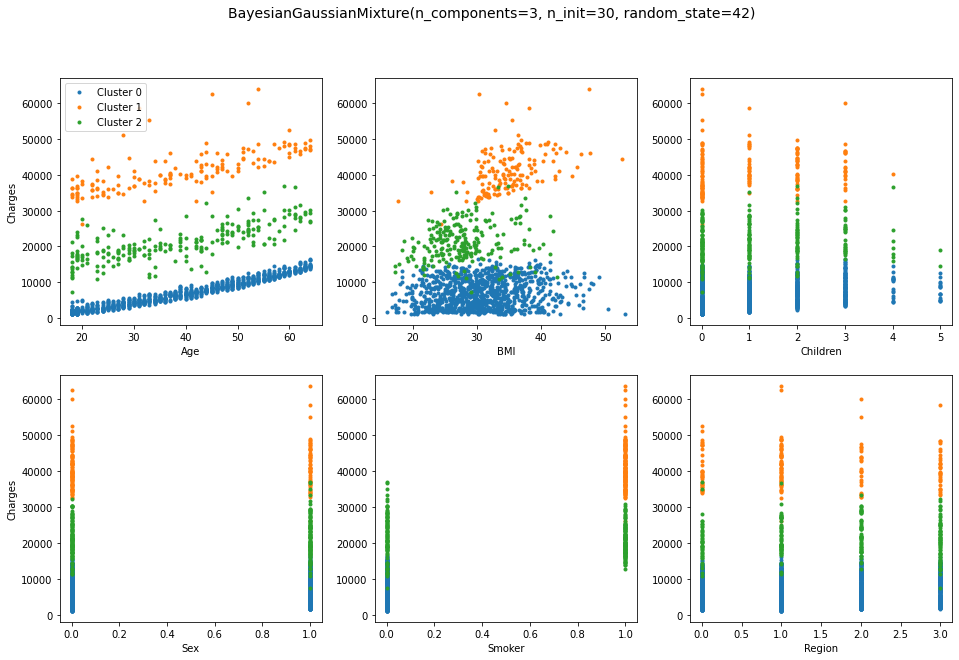

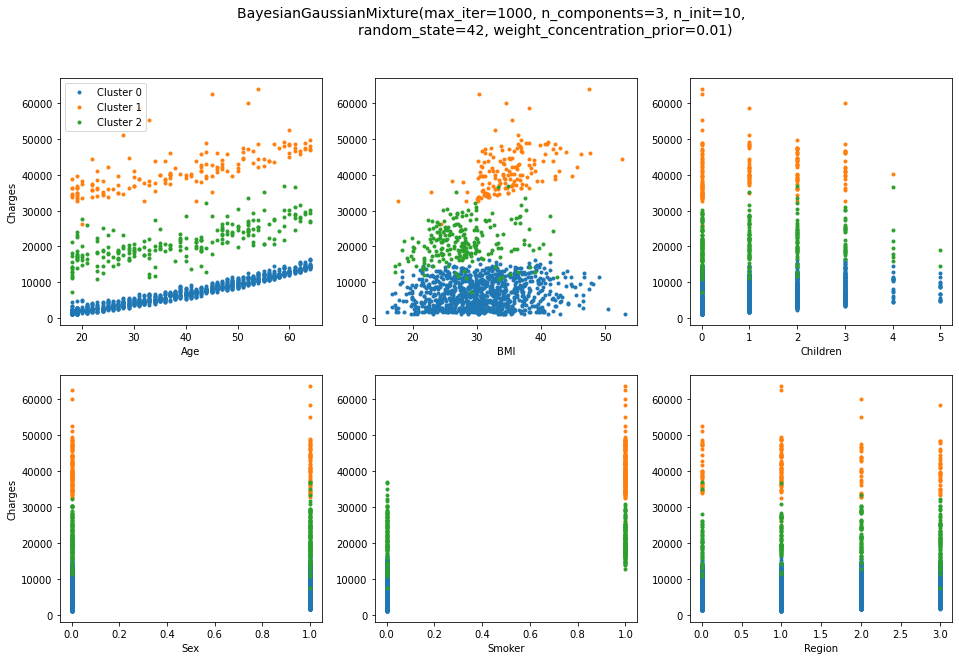

In [6]:
for i in range(len(n_clusters)):
    n = n_clusters[i]
    fig=plt.figure(figsize=(16,10))
    fig.suptitle(titles[i], fontsize=14)
    plt.subplot(231)
    for j in range(n):
        plt.plot(data[predicts[i]==j,0], data[predicts[i]==j,-1],'.', label='Cluster '+str(j))
    if len(data[predicts[i]==-1,0])!=0:
        plt.plot(data[predicts[i]==-1,0], data[predicts[i]==-1,-1],'.', label='Cluster '+str(-1))
    plt.ylabel('Charges')
    plt.xlabel('Age')
    plt.legend(loc='upper left')
    plt.subplot(232)
    for j in range(n):
        plt.plot(data[predicts[i]==j,2], data[predicts[i]==j,-1],'.', label='Cluster '+str(j))
    if len(data[predicts[i]==-1,2])!=0:
        plt.plot(data[predicts[i]==-1,2], data[predicts[i]==-1,-1],'.', label='Cluster '+str(-1))
    plt.xlabel('BMI')
    plt.subplot(233)
    for j in range(n):
        plt.plot(data[predicts[i]==j,3], data[predicts[i]==j,-1],'.', label='Cluster '+str(j))
    if len(data[predicts[i]==-1,3])!=0:
        plt.plot(data[predicts[i]==-1,3], data[predicts[i]==-1,-1],'.', label='Cluster '+str(-1))
    plt.xlabel('Children')
    
    plt.subplot(234)
    for j in range(n):
        plt.plot(data[predicts[i]==j,1], data[predicts[i]==j,-1],'.', label='Cluster '+str(j))            
    if len(data[predicts[i]==-1,1])!=0:
        plt.plot(data[predicts[i]==-1,1], data[predicts[i]==-1,-1],'.', label='Cluster '+str(-1))
    plt.ylabel('Charges')
    plt.xlabel('Sex')
    plt.subplot(235)
    for j in range(n):
        plt.plot(data[predicts[i]==j,4], data[predicts[i]==j,-1],'.', label='Cluster '+str(j))
    if len(data[predicts[i]==-1,4])!=0:
        plt.plot(data[predicts[i]==-1,4], data[predicts[i]==-1,-1],'.', label='Cluster '+str(-1))
    plt.xlabel('Smoker')
    plt.subplot(236)
    for j in range(n):
        plt.plot(data[predicts[i]==j,5], data[predicts[i]==j,-1],'.', label='Cluster '+str(j))
    if len(data[predicts[i]==-1,5])!=0:
        plt.plot(data[predicts[i]==-1,5], data[predicts[i]==-1,-1],'.', label='Cluster '+str(-1))
    plt.xlabel('Region')
    plt.show()
    print('\n\n\n')

### What can we learn from the dataset categories?

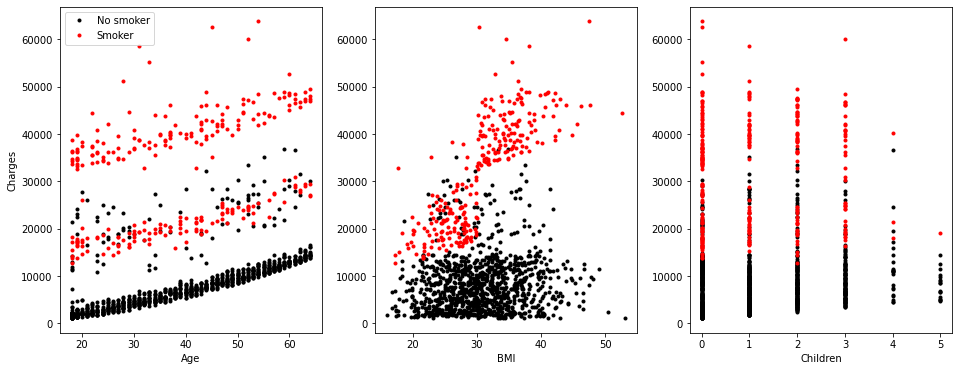

In [7]:
plt.figure(figsize=(16,6))

plt.subplot(131)
plt.plot(data[data[:,4]==0,0], data[data[:,4]==0,6],'k.',label='No smoker')
plt.plot(data[data[:,4]==1,0], data[data[:,4]==1,6],'r.', label='Smoker')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.legend(loc='upper left')

plt.subplot(132)
plt.plot(data[data[:,4]==0,2], data[data[:,4]==0,6],'k.',label='No smoker')
plt.plot(data[data[:,4]==1,2], data[data[:,4]==1,6],'r.', label='Smoker')
plt.xlabel('BMI')

plt.subplot(133)
plt.plot(data[data[:,4]==0,3], data[data[:,4]==0,6],'k.',label='No smoker')
plt.plot(data[data[:,4]==1,3], data[data[:,4]==1,6],'r.', label='Smoker')
plt.xlabel('Children')

plt.show()

Looking at this graphs and the GaussianMixtures clusters graphs (the ones I think fits better in this case) I can deduce the following information about the dataset.

I can observe 3 clusters:
* The **no smoker** cluster, the one that has the lowest charges (~0-12k dollars).


* The **smoker and BMI** cluster, the one with the highest charges (~30-50k dollars) formed by smokers that also have BMI>30.


* The **smoker and no smokers outliers** cluster, the one with medium prices formed by smokers with BMI<30 and people that doesn't smoke but they get special conditions (unknown) that makes them pay higher charges, as could be, *for example*, cardiovascular diseases.

### Finding the anomalies

In [8]:
# I am using GaussianMixture to find the anomalies because I think it's the one that fits with more accuracy
GM = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
GM.fit(data)

threshold         = 4.00                                  # Threshold in %
densities         = GM.score_samples(data)
density_threshold = np.percentile(densities, threshold)   # Threshold applied!
anomalies         = data[densities < density_threshold]   # The anomalies have less density than the threshold
print('There are %i anomalies with a %.2f %% threshold.' %(len(anomalies),threshold))

There are 54 anomalies with a 4.00 % threshold.


### Graphical visualization of the anomalies as red stars

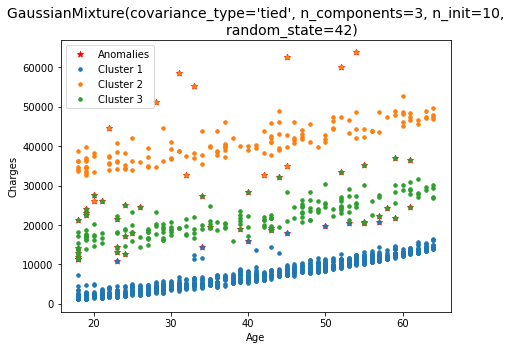

In [9]:
model = 6 #The model I am using is the one with index 6 in the models list
n = n_clusters[model]
fig=plt.figure(figsize=(7,5))
plt.title(titles[model], fontsize=14)
plt.scatter(anomalies[:, 0], anomalies[:, 6], color='r', marker='*', label='Anomalies')
for j in range(n):
    plt.plot(data[predicts[model]==j,0], data[predicts[model]==j,-1],'.', label='Cluster '+str(j+1), markersize=7)
plt.ylabel('Charges')
plt.xlabel('Age')
plt.legend(loc='best')
plt.show()